In [2]:
import requests
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="1+EVjzvcWpe08Ghzd6ksneB7HJHv4prpK4JMUf3mfGI=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})

# 印出表格內容
print(rate_table)

<table class="table table-striped table-bordered table-condensed table-hover" summary="此表格是牌告匯率，表格分為七直欄，第一直欄是幣別，第二直欄是本行買入現金匯率，第三直欄是本行賣出現金匯率，第四直欄是本行買入即期匯率，第五直欄是本行賣出即期匯率，第六直欄是遠期匯率連結，第七直欄是歷史匯率連結。" title="牌告匯率">
<thead class="phone-medium-font">
<tr>
<th class="print_width set-title-L-min-width-class noscript" rowspan="2" scope="auto">幣別</th>
<th class="print_width rowSP_Ctrl_2_2_2 set-title-L-min-width-class hasscript xrt-currency" scope="auto">幣別</th>
<th class="print_hide rate-content-cash xrt-rate" colspan="2" scope="auto">現金匯率</th>
<th class="hidden" scope="auto"></th>
<th class="print_hide rate-content-sight xrt-rate" colspan="2" scope="auto">即期匯率</th>
<th class="hidden" scope="auto"></th>
<th class="print_hide" rowspan="2" scope="auto"><span class=""><span>遠期匯率</span></span></th>
<th class="print_hide noscript" rowspan="2" scope="auto">歷史匯率</th>
<th class="print_hide rowSP_Ctrl_2_2_2 hasscript" scope="auto">歷史匯率</th>
<th class="display_none_print_show print_width" colspan="2" scope=

In [4]:
from locale import currency
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})
# 取得所有幣別和現金匯率資料
currency_raw = rate_table.tbody.find_all('tr')# 跳過表頭行
print(currency_raw)

[<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="美金" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show xrt-cur-indent">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">32.435</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">33.105</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">
                        32.76
                    </td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">
                        32.91
                    </td>
<td class="text-center print_h

In [5]:
from locale import currency
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})
# 取得所有幣別和現金匯率資料
currency_raw = rate_table.tbody.find_all('tr')# 跳過表頭行

for row in currency_raw:
    # 取得幣別名稱 (移除多餘空白)
    currency = row.find("td", attrs={"data-table":"幣別"}).find("div",class_="visible-phone").text.strip()
    # 取得現金買入匯率
    currency_get = row.find("td", attrs={"data-table":"本行現金買入"}).text.strip()

    currency_sent = row.find("td", attrs={"data-table":"本行現金賣出"}).text.strip()
    print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_sent}")
    print("======================")
    # 取得幣別名稱 (移除多餘空白)
    # currency = row.find('div', class_='visible-phone').text.strip()
    
    # # 取得現金買入匯率
    # cash_buy = row.find_all('td')[1].text.strip()
    # # 取得現金賣出匯率
    # cash_sell = row.find_all('td')[2].text.strip()
    
    # # 轉換匯率值
    # cash_buy = round(float(cash_buy), 2) if cash_buy else None
    # cash_sell = round(float(cash_sell), 2) if cash_sell else None
    
    # print(f"幣別: {currency}")
    # print(f"現金買入: {cash_buy}")
    # print(f"現金賣出: {cash_sell}")
    # print("-" * 30)

幣別: 美金 (USD), 現金買入: 32.435, 現金賣出: 33.105
幣別: 港幣 (HKD), 現金買入: 4.07, 現金賣出: 4.274
幣別: 英鎊 (GBP), 現金買入: 41.24, 現金賣出: 43.36
幣別: 澳幣 (AUD), 現金買入: 20.32, 現金賣出: 21.1
幣別: 加拿大幣 (CAD), 現金買入: 22.35, 現金賣出: 23.26
幣別: 新加坡幣 (SGD), 現金買入: 24.09, 現金賣出: 25
幣別: 瑞士法郎 (CHF), 現金買入: 36.51, 現金賣出: 37.71
幣別: 日圓 (JPY), 現金買入: 0.2127, 現金賣出: 0.2255
幣別: 南非幣 (ZAR), 現金買入: -, 現金賣出: -
幣別: 瑞典幣 (SEK), 現金買入: -, 現金賣出: -
幣別: 紐元 (NZD), 現金買入: 18.27, 現金賣出: 19.12
幣別: 泰幣 (THB), 現金買入: 0.8463, 現金賣出: 1.0363
幣別: 菲國比索 (PHP), 現金買入: 0.5055, 現金賣出: 0.6375
幣別: 印尼幣 (IDR), 現金買入: 0.00168, 現金賣出: 0.00238
幣別: 歐元 (EUR), 現金買入: 34.77, 現金賣出: 36.11
幣別: 韓元 (KRW), 現金買入: 0.02091, 現金賣出: 0.02481
幣別: 越南盾 (VND), 現金買入: 0.00104, 現金賣出: 0.00145
幣別: 馬來幣 (MYR), 現金買入: 6.412, 現金賣出: 7.937
幣別: 人民幣 (CNY), 現金買入: 4.437, 現金賣出: 4.599


In [6]:
from locale import currency
from pprint import pprint
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})
# 取得所有幣別和現金匯率資料
currency_raw = rate_table.tbody.find_all('tr')# 跳過表頭行

rates:list[dict] = []

for row in currency_raw:
    currency_dict = {}
    # 取得幣別名稱 (移除多餘空白)
    currency = row.find("td", attrs={"data-table":"幣別"}).find("div",class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency
    # 取得現金買入匯率
    currency_get = row.find("td", attrs={"data-table":"本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get
    # 取得即期賣出匯率
    currency_sent = row.find("td", attrs={"data-table":"本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_sent
    rates.append(currency_dict)
pprint(rates)

[{'幣別': '美金 (USD)', '現金買入': '32.435', '現金賣出': '33.105'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.07', '現金賣出': '4.274'},
 {'幣別': '英鎊 (GBP)', '現金買入': '41.24', '現金賣出': '43.36'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.32', '現金賣出': '21.1'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.35', '現金賣出': '23.26'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '24.09', '現金賣出': '25'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '36.51', '現金賣出': '37.71'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2127', '現金賣出': '0.2255'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.27', '現金賣出': '19.12'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8463', '現金賣出': '1.0363'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5055', '現金賣出': '0.6375'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '34.77', '現金賣出': '36.11'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.02091', '現金賣出': '0.02481'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.412', '現金賣出': '7.937'}

In [7]:
import pandas as pd
df = pd.DataFrame(rates)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
幣別,美金 (USD),港幣 (HKD),英鎊 (GBP),澳幣 (AUD),加拿大幣 (CAD),新加坡幣 (SGD),瑞士法郎 (CHF),日圓 (JPY),南非幣 (ZAR),瑞典幣 (SEK),紐元 (NZD),泰幣 (THB),菲國比索 (PHP),印尼幣 (IDR),歐元 (EUR),韓元 (KRW),越南盾 (VND),馬來幣 (MYR),人民幣 (CNY)
現金買入,32.435,4.07,41.24,20.32,22.35,24.09,36.51,0.2127,-,-,18.27,0.8463,0.5055,0.00168,34.77,0.02091,0.00104,6.412,4.437
現金賣出,33.105,4.274,43.36,21.1,23.26,25,37.71,0.2255,-,-,19.12,1.0363,0.6375,0.00238,36.11,0.02481,0.00145,7.937,4.599


In [8]:
import pandas as pd
df = pd.DataFrame(rates)
df

,幣別,現金買入,現金賣出
0,美金 (USD),32.435,33.105
1,港幣 (HKD),4.07,4.274
2,英鎊 (GBP),41.24,43.36
3,澳幣 (AUD),20.32,21.1
4,加拿大幣 (CAD),22.35,23.26
5,新加坡幣 (SGD),24.09,25
6,瑞士法郎 (CHF),36.51,37.71
7,日圓 (JPY),0.2127,0.2255
8,南非幣 (ZAR),-,-
9,瑞典幣 (SEK),-,-


In [9]:
def filter_func(item:dict)->bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True
    
filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '現金買入': '32.435', '現金賣出': '33.105'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.07', '現金賣出': '4.274'},
 {'幣別': '英鎊 (GBP)', '現金買入': '41.24', '現金賣出': '43.36'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.32', '現金賣出': '21.1'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.35', '現金賣出': '23.26'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '24.09', '現金賣出': '25'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '36.51', '現金賣出': '37.71'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2127', '現金賣出': '0.2255'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.27', '現金賣出': '19.12'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8463', '現金賣出': '1.0363'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5055', '現金賣出': '0.6375'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '34.77', '現金賣出': '36.11'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.02091', '現金賣出': '0.02481'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.412', '現金賣出': '7.937'},
 {'幣別': '人民幣 (CNY)', '現金買入': '4.437', '現金賣出': '4.599'}]

In [10]:
def map_func(item:dict)->dict:
    item["現金買入"] = float(item["現金買入"])
    item["現金賣出"] = float(item["現金賣出"])
    return item

clear_list = list(map(map_func,filtered_rates))
clear_list

[{'幣別': '美金 (USD)', '現金買入': 32.435, '現金賣出': 33.105},
 {'幣別': '港幣 (HKD)', '現金買入': 4.07, '現金賣出': 4.274},
 {'幣別': '英鎊 (GBP)', '現金買入': 41.24, '現金賣出': 43.36},
 {'幣別': '澳幣 (AUD)', '現金買入': 20.32, '現金賣出': 21.1},
 {'幣別': '加拿大幣 (CAD)', '現金買入': 22.35, '現金賣出': 23.26},
 {'幣別': '新加坡幣 (SGD)', '現金買入': 24.09, '現金賣出': 25.0},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': 36.51, '現金賣出': 37.71},
 {'幣別': '日圓 (JPY)', '現金買入': 0.2127, '現金賣出': 0.2255},
 {'幣別': '紐元 (NZD)', '現金買入': 18.27, '現金賣出': 19.12},
 {'幣別': '泰幣 (THB)', '現金買入': 0.8463, '現金賣出': 1.0363},
 {'幣別': '菲國比索 (PHP)', '現金買入': 0.5055, '現金賣出': 0.6375},
 {'幣別': '印尼幣 (IDR)', '現金買入': 0.00168, '現金賣出': 0.00238},
 {'幣別': '歐元 (EUR)', '現金買入': 34.77, '現金賣出': 36.11},
 {'幣別': '韓元 (KRW)', '現金買入': 0.02091, '現金賣出': 0.02481},
 {'幣別': '越南盾 (VND)', '現金買入': 0.00104, '現金賣出': 0.00145},
 {'幣別': '馬來幣 (MYR)', '現金買入': 6.412, '現金賣出': 7.937},
 {'幣別': '人民幣 (CNY)', '現金買入': 4.437, '現金賣出': 4.599}]

In [11]:
import pandas as pd
df = pd.DataFrame(clear_list)
df

,幣別,現金買入,現金賣出
0,美金 (USD),32.43500,33.10500
1,港幣 (HKD),4.07000,4.27400
2,英鎊 (GBP),41.24000,43.36000
3,澳幣 (AUD),20.32000,21.10000
4,加拿大幣 (CAD),22.35000,23.26000
5,新加坡幣 (SGD),24.09000,25.00000
6,瑞士法郎 (CHF),36.51000,37.71000
7,日圓 (JPY),0.21270,0.22550
8,紐元 (NZD),18.27000,19.12000
9,泰幣 (THB),0.84630,1.03630


In [12]:
import pandas as pd
df = pd.DataFrame(clear_list)
df.sort_values(by="現金買入",ascending=False)
df.head()

,幣別,現金買入,現金賣出
0,美金 (USD),32.435,33.105
1,港幣 (HKD),4.070,4.274
2,英鎊 (GBP),41.240,43.360
3,澳幣 (AUD),20.320,21.100
4,加拿大幣 (CAD),22.350,23.260


In [13]:
df.tail()

,幣別,現金買入,現金賣出
12,歐元 (EUR),34.77000,36.11000
13,韓元 (KRW),0.02091,0.02481
14,越南盾 (VND),0.00104,0.00145
15,馬來幣 (MYR),6.41200,7.93700
16,人民幣 (CNY),4.43700,4.59900


In [14]:
#subscript
df['現金買入']

0     32.43500
1      4.07000
2     41.24000
3     20.32000
4     22.35000
5     24.09000
6     36.51000
7      0.21270
8     18.27000
9      0.84630
10     0.50550
11     0.00168
12    34.77000
13     0.02091
14     0.00104
15     6.41200
16     4.43700
Name: 現金買入, dtype: float64

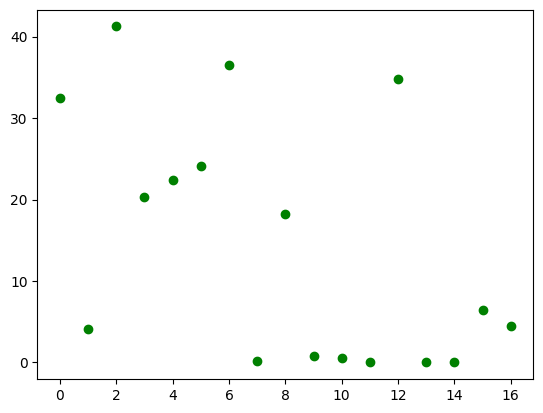

In [15]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure()
ax_1 = fig.add_subplot(1,1,1)
ax_1.plot(df['現金買入'],'go')
plt.show()

In [16]:
df['幣別'].apply(lambda x: x.split()[-1])

0     (USD)
1     (HKD)
2     (GBP)
3     (AUD)
4     (CAD)
5     (SGD)
6     (CHF)
7     (JPY)
8     (NZD)
9     (THB)
10    (PHP)
11    (IDR)
12    (EUR)
13    (KRW)
14    (VND)
15    (MYR)
16    (CNY)
Name: 幣別, dtype: object

C:\Users\阿群\AppData\Local\Temp\ipykernel_32036\3263359907.py:5: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  ax_1.bar(df['現金買入'].apply(lambda x: x.split()[-1],df['現金買入']))


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

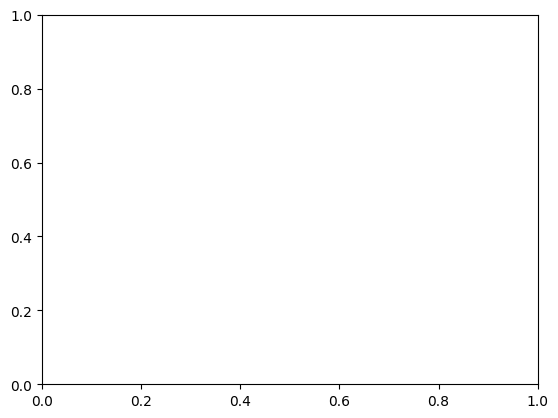

In [17]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure()
ax_1 = fig.add_subplot(1,1,1)
ax_1.bar(df['現金買入'].apply(lambda x: x.split()[-1],df['現金買入']))
         

plt.show()